## 1.Importing Libraries

In [2]:
# installing scikit-multilearn package
!pip install scikit-multilearn 

     |████████████████████████████████| 89 kB 8.1 MB/s             


In [3]:
!pip install imbalanced-learn

     |████████████████████████████████| 199 kB 18.8 MB/s            
     |████████████████████████████████| 189 kB 72.4 MB/s            


In [6]:
!pip install neattext

In [147]:
import pandas as pd 
import numpy as np 
import string
import re
import string
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score, hamming_loss
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings
%matplotlib inline 
sns.set(color_codes=True)
warnings.simplefilter(action='ignore', category=FutureWarning)

In [59]:
#skmulitlearn packages
from skmultilearn.problem_transform import BinaryRelevance
from skmultilearn.adapt import BRkNNaClassifier
from skmultilearn.adapt import MLkNN

## 2. Data Exploration

#### Data Loading

In [209]:
# Loading data 
data = pd.read_csv('./data/data.csv')


#### Data Analysis

In [186]:
data.shape

(159571, 8)

In [187]:
data

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
159566,ffe987279560d7ff,""":::::And for the second time of asking, when ...",0,0,0,0,0,0
159567,ffea4adeee384e90,You should be ashamed of yourself \n\nThat is ...,0,0,0,0,0,0
159568,ffee36eab5c267c9,"Spitzer \n\nUmm, theres no actual article for ...",0,0,0,0,0,0
159569,fff125370e4aaaf3,And it looks like it was actually you who put ...,0,0,0,0,0,0


In [188]:
data.describe()

,toxic,severe_toxic,obscene,threat,insult,identity_hate
count,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000
mean,0.095844,0.009996,0.052948,0.002996,0.049364,0.008805
std,0.294379,0.099477,0.223931,0.054650,0.216627,0.093420
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Checking if there are missing values 

In [189]:
print(data.isnull().sum())

id               0
comment_text     0
toxic            0
severe_toxic     0
obscene          0
threat           0
insult           0
identity_hate    0
dtype: int64


<AxesSubplot:>

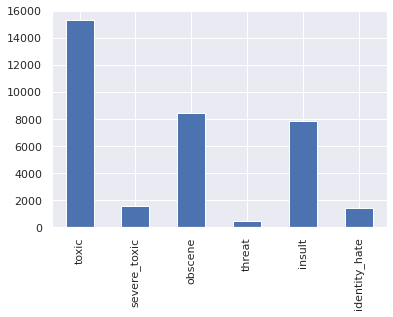

In [190]:
labels = ['toxic', 'severe_toxic', 'obscene', 'threat', 
      'insult', 'identity_hate']
labels_data = data[labels]
label_count = labels_data.sum()
label_count.plot(kind='bar')

In [191]:
print(label_count)
sum_all=0
for x in labels: 
    sum_all += data[x].sum()
print('Total\t\t', sum_all)

toxic            15294
severe_toxic      1595
obscene           8449
threat             478
insult            7877
identity_hate     1405
dtype: int64
Total		 35098


In [192]:
# data[[(data.toxic == 0) and (data.sever_toxic == 0) and (data.obscene ==0) and (data.threat == 0) and (data.insult == 0) and (data.identity_hate == 0)]]
# data[(data.toxic == 0) & (data.threat == 0) & (data.severe_toxic == 0) & (data.obscene ==0) & (data.insult == 0) & (data.identity_hate == 0)].sum()

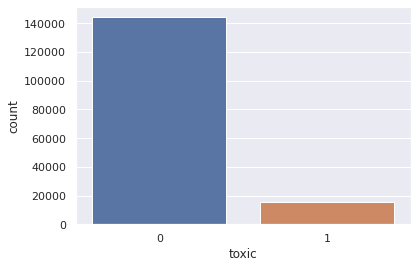

In [193]:
g = sns.countplot(data['toxic'])
plt.show()

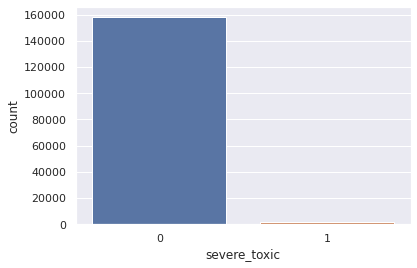

In [194]:
g = sns.countplot(data['severe_toxic'])
plt.show()

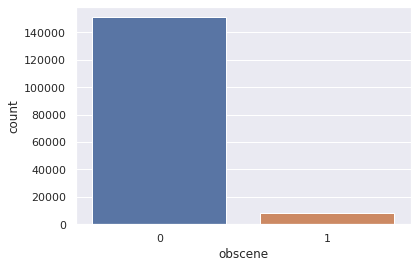

In [195]:
g = sns.countplot(data['obscene'])
plt.show()

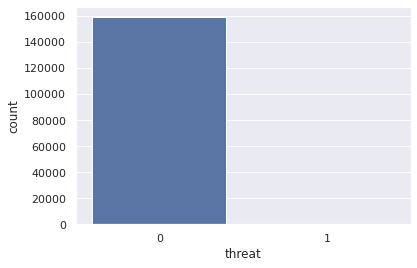

In [196]:
g = sns.countplot(data['threat'])
plt.show()


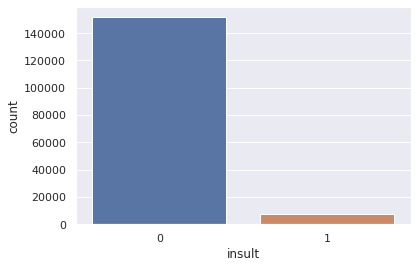

In [197]:
g = sns.countplot(data['insult'])
plt.show()

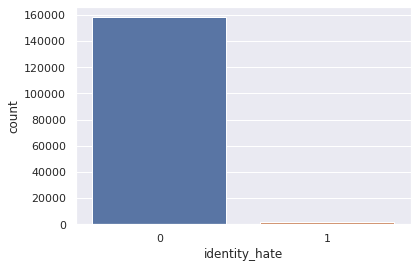

In [198]:
g = sns.countplot(data['identity_hate'])
plt.show()

We can see form the output above that in some rows, all feateure is 0. This means that the comment does not fall into any toxic class. Thus, we need a new column that will distenguish between non-toxic and toxic comments. 

This new column will be called "Class" that will hold the following information: 
   * 0 = `non-toxic`
   * 1 = `toxic`


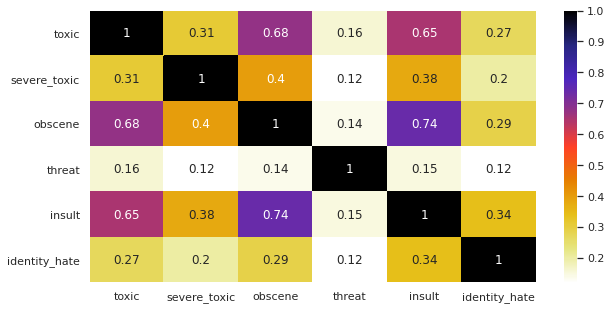

In [199]:
corr_matrix = data.corr().abs().round(2)
plt.figure(figsize=(10,5))
sns.heatmap(corr_matrix, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

In [200]:
# data_copy = data.copy()

In [211]:
data.drop('id', axis=1, inplace=True)

In [212]:
data_drop = data_copy[
    (data['toxic'] == 0) & 
    (data['severe_toxic'] == 0) & 
    (data['obscene'] == 0) & 
    (data['threat'] == 0) & 
    (data['insult'] == 0) & 
    (data['identity_hate'] == 0)
         ]

In [213]:
data.drop(data_drop.index, axis=0, inplace=True)
data.reset_index(drop=True, inplace=True)

In [214]:
data

,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK,1,1,1,0,1,0
1,Hey... what is it..\n@ | talk .\nWhat is it......,1,0,0,0,0,0
2,"Bye! \n\nDon't look, come or think of comming ...",1,0,0,0,0,0
3,You are gay or antisemmitian? \n\nArchangel WH...,1,0,1,0,1,1
4,"FUCK YOUR FILTHY MOTHER IN THE ASS, DRY!",1,0,1,0,1,0
...,...,...,...,...,...,...,...
16220,"""\n\n our previous conversation \n\nyou fuckin...",1,0,1,0,1,1
16221,YOU ARE A MISCHIEVIOUS PUBIC HAIR,1,0,0,0,1,0
16222,Your absurd edits \n\nYour absurd edits on gre...,1,0,1,0,1,0
16223,"""\n\nHey listen don't you ever!!!! Delete my e...",1,0,0,0,1,0


## 3. Data Engineering

First, we will define a function to: 
  * `remove HTML tags`
  * `convert letter to lowercase`
  * `remove stopwords`

In [145]:
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import *
import neattext.functions as nfx

import re
from bs4 import BeautifulSoup

def preprocess_data(data):
#     nltk.download("stopwords", quiet=True)
#     stemmer = PorterStemmer()
    
    text = BeautifulSoup(data, "html.parser").get_text() # Remove HTML tags
    text = re.sub(r"[^a-zA-Z]", " ", text.lower()) # Convert to lower case
    words = nfx.remove_stopwords(text)
#     words = text.split() # Split string into words
#     words = [PorterStemmer().stem(w) for w in words] # stem
    
    return words

A sample of an original comment

In [215]:
data['comment_text'][0]

'COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK'

In [216]:
# Process all comments 
comments = data['comment_text']
proc_data = comments.apply(preprocess_data)

Now, lets see the same comment after processing

In [217]:
proc_data[0]

'cocksucker piss work'

In [218]:
# Defining TfidFVectorizer and transforming comments
vectorT = TfidfVectorizer()
vectorC = CountVectorizer()
Xfeatures = vectorT.fit_transform(proc_data)

In [219]:
print(Xfeatures)

  (0, 32690)	0.4844164073476492
  (0, 22134)	0.5760323610815526
  (0, 5503)	0.6584280243726024
  (1, 31861)	0.16678808542399326
  (1, 20164)	0.2227063993008921
  (1, 15475)	0.15831644954166552
  (1, 2752)	0.16324521472371814
  (1, 5321)	0.1752642593643964
  (1, 26841)	0.25150053778936754
  (1, 1744)	0.14291082300221608
  (1, 6221)	0.1752642593643964
  (1, 20142)	0.14967656767146448
  (1, 7804)	0.21744690980189788
  (1, 27230)	0.17776229670200377
  (1, 1269)	0.1420917077646965
  (1, 124)	0.26212759757700677
  (1, 23548)	0.17574518211158033
  (1, 1749)	0.21994494713950527
  (1, 12019)	0.18945928277366175
  (1, 23376)	0.26212759757700677
  (1, 1429)	0.20453932060005584
  (1, 25996)	0.13720137302112623
  (1, 7799)	0.20049909997916704
  (1, 12543)	0.10822200722922268
  (1, 28881)	0.25150053778936754
  :	:
  (16223, 7515)	0.12190102434108699
  (16223, 28064)	0.2529707811517467
  (16223, 26415)	0.1627598998873278
  (16223, 28229)	0.17626271407851757
  (16223, 1768)	0.17874467432035993
  (1622

In [221]:
vectorT.get_feature_names()[0:20]

['aa',
 'aaa',
 'aaaa',
 'aaaaa',
 'aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaany',
 'aaaaaaaaaah',
 'aaaannnnyyyywwwwhhhheeeerrrreeee',
 'aaaawwww',
 'aaaboyz',
 'aaarrrgggh',
 'aachi',
 'aademia',
 'aake',
 'aaliyah',
 'aamir',
 'aand',
 'aapl',
 'aargh',
 'aaron',
 'aarp']

In [224]:
print(type(Xfeatures))


<class 'scipy.sparse.csr.csr_matrix'>


In [155]:
data['commentsVect'][0] = Xfeatures

/home/ec2-user/anaconda3/envs/mxnet_p36/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


In [156]:
y = data[labels]
x = data['commentsVect']

In [157]:
# spliting data into trianing and testing sets 
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [158]:
print(len(y_train))
print(X_train.shape)
print(type(X_train))
print(X_train)

127656
(127656,)
<class 'pandas.core.series.Series'>
59130       (0, 100713)\t1\n  (0, 145294)\t1\n  (0, 8917...
141729      (0, 100713)\t1\n  (0, 163294)\t1\n  (0, 5280...
12576       (0, 15404)\t1\n  (0, 76620)\t1\n  (0, 150020...
120883                      (0, 145333)\t1\n  (0, 69151)\t1
108367      (0, 9120)\t1\n  (0, 164743)\t1\n  (0, 145194...
                                ...                        
131166      (0, 89178)\t1\n  (0, 110572)\t1\n  (0, 95897...
18380       (0, 160802)\t1\n  (0, 131469)\t1\n  (0, 9120...
81454       (0, 160802)\t1\n  (0, 134107)\t1\n  (0, 5097...
122942      (0, 117150)\t1\n  (0, 85215)\t1\n  (0, 11204...
38852                        (0, 60396)\t1\n  (0, 56689)\t1
Name: commentsVect, Length: 127656, dtype: object


In [40]:
# undersample = RandomUnderSampler(sampling_strategy='majority')
# x_train_under, y_train_under = undersample.fit_resample(X_train, y_train)

168464

In [121]:
import os
def save_to_csv(x, y, filename, data_dir): 
    if not os.path.exists(data_dir):
        os.makedirs(data_dir)
    
    df_x = pd.DataFrame(x)
#     for i in x: 
#         df_x.append(i)
    df_y = pd.DataFrame(y)
    df = pd.concat([df_x, df_y], axis=1)
    df.to_csv(data_dir+"/"+filename, index=False, header=False)
    
    pass

In [159]:
data_dir = 'sagemaker_data'

save_to_csv(X_train, y_train, 'train.csv', data_dir)
save_to_csv(X_test, y_test, 'test.csv', data_dir)

In [167]:
df = pd.read_csv(data_dir+'/train.csv')
print(type(df.iloc[:,0]))

<class 'pandas.core.series.Series'>


## 4. Uploading data to S3 bucket

In [48]:
import boto3
import sagemaker

In [49]:
sagemaker_session = sagemaker.Session()
role = sagemaker.get_execution_role()

bucket = sagemaker_session.default_bucket()

In [50]:
prefix = 'capstone_project'

train_path = sagemaker_session.upload_data(data_dir, bucket=bucket, key_prefix=prefix)

In [56]:
!pygmentize model/train_binR.py

from __future__ import print_function

import argparse
import os
import pandas as pd

# sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. 
from sklearn.externals import joblib
# Import joblib package directly
#import joblib

## TODO: Import any additional libraries you need to define a model
#from sklearn.linear_model import LogisticRegression
from skmultilearn.problem_transform import BinaryRelevance
from sklearn.naive_bayes import MultinomialNB
# Provided model load function
def model_fn(model_dir):
    """Load model from the model_dir. This is the same model that is saved
    in the main if statement.
    """
    print("Loading model.")
    
    # load using joblib
    model = joblib.load(os.path.join(model_dir, "model.joblib"))
    print("Done loading model.")
    
    return model

if __name__ == '__main__':
    
    # All of the model parameters and training parameters are sent as arguments
    # when this script is executed, during a training job
    
 

#### Defining the Estimator

In [61]:
from sagemaker.sklearn.estimator import SKLearn
estimator = SKLearn(sagemaker_session=sagemaker_session,
                    entry_point='train_binR.py',
                    source_dir='model/',
                    role=role, 
                    instance_type='ml.m5.xlarge',
                    framework_version='0.20.0')

#### Training the estimator

In [131]:
%%time

# Train your estimator on S3 training data
estimator.fit(train_path)

2022-01-26 15:19:48 Starting - Starting the training job...
2022-01-26 15:20:18 Starting - Launching requested ML instancesProfilerReport-1643210387: InProgress
......
2022-01-26 15:21:18 Starting - Preparing the instances for training............
2022-01-26 15:23:18 Downloading - Downloading input data...
2022-01-26 15:23:49 Training - Training image download completed. Training in progress.
2022-01-26 15:23:49 Uploading - Uploading generated training model2022-01-26 15:23:39,080 sagemaker-containers INFO     Imported framework sagemaker_sklearn_container.training
2022-01-26 15:23:39,083 sagemaker-training-toolkit INFO     No GPUs detected (normal if no gpus installed)
2022-01-26 15:23:39,091 sagemaker_sklearn_container.training INFO     Invoking user training script.
2022-01-26 15:23:39,431 sagemaker-training-toolkit INFO     No GPUs detected (normal if no gpus installed)
2022-01-26 15:23:42,467 sagemaker-training-toolkit INFO     No GPUs detected (normal if no gpus installed)
2022-0

UnexpectedStatusException: Error for Training job sagemaker-scikit-learn-2022-01-26-15-19-47-954: Failed. Reason: AlgorithmError: framework error: 
Traceback (most recent call last):
  File "/miniconda3/lib/python3.7/site-packages/sagemaker_containers/_trainer.py", line 84, in train
    entrypoint()
  File "/miniconda3/lib/python3.7/site-packages/sagemaker_sklearn_container/training.py", line 39, in main
    train(environment.Environment())
  File "/miniconda3/lib/python3.7/site-packages/sagemaker_sklearn_container/training.py", line 35, in train
    runner_type=runner.ProcessRunnerType)
  File "/miniconda3/lib/python3.7/site-packages/sagemaker_training/entry_point.py", line 100, in run
    wait, capture_error
  File "/miniconda3/lib/python3.7/site-packages/sagemaker_training/process.py", line 291, in run
    cwd=environment.code_dir,
  File "/miniconda3/lib/python3.7/site-packages/sagemaker_training/process.py", line 208, in check_error
    info=extra_info,
sagemaker_training.errors.ExecuteUserScriptError: ExecuteUserScriptError:
ExitCode 1
ErrorMessage ""
Command "/miniconda3/bin/python train_binR.py"

ExecuteUserScrip